
#Import libraries

In [ ]:
import tensorflow.keras as tk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load data

In [ ]:
(x_train, y_train), (x_test, y_test) = tk.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

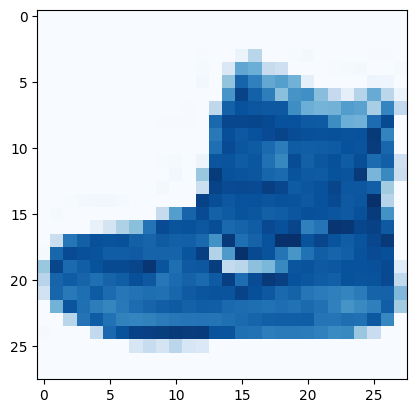

In [ ]:
plt.imshow(x_train[0],cmap="Blues")

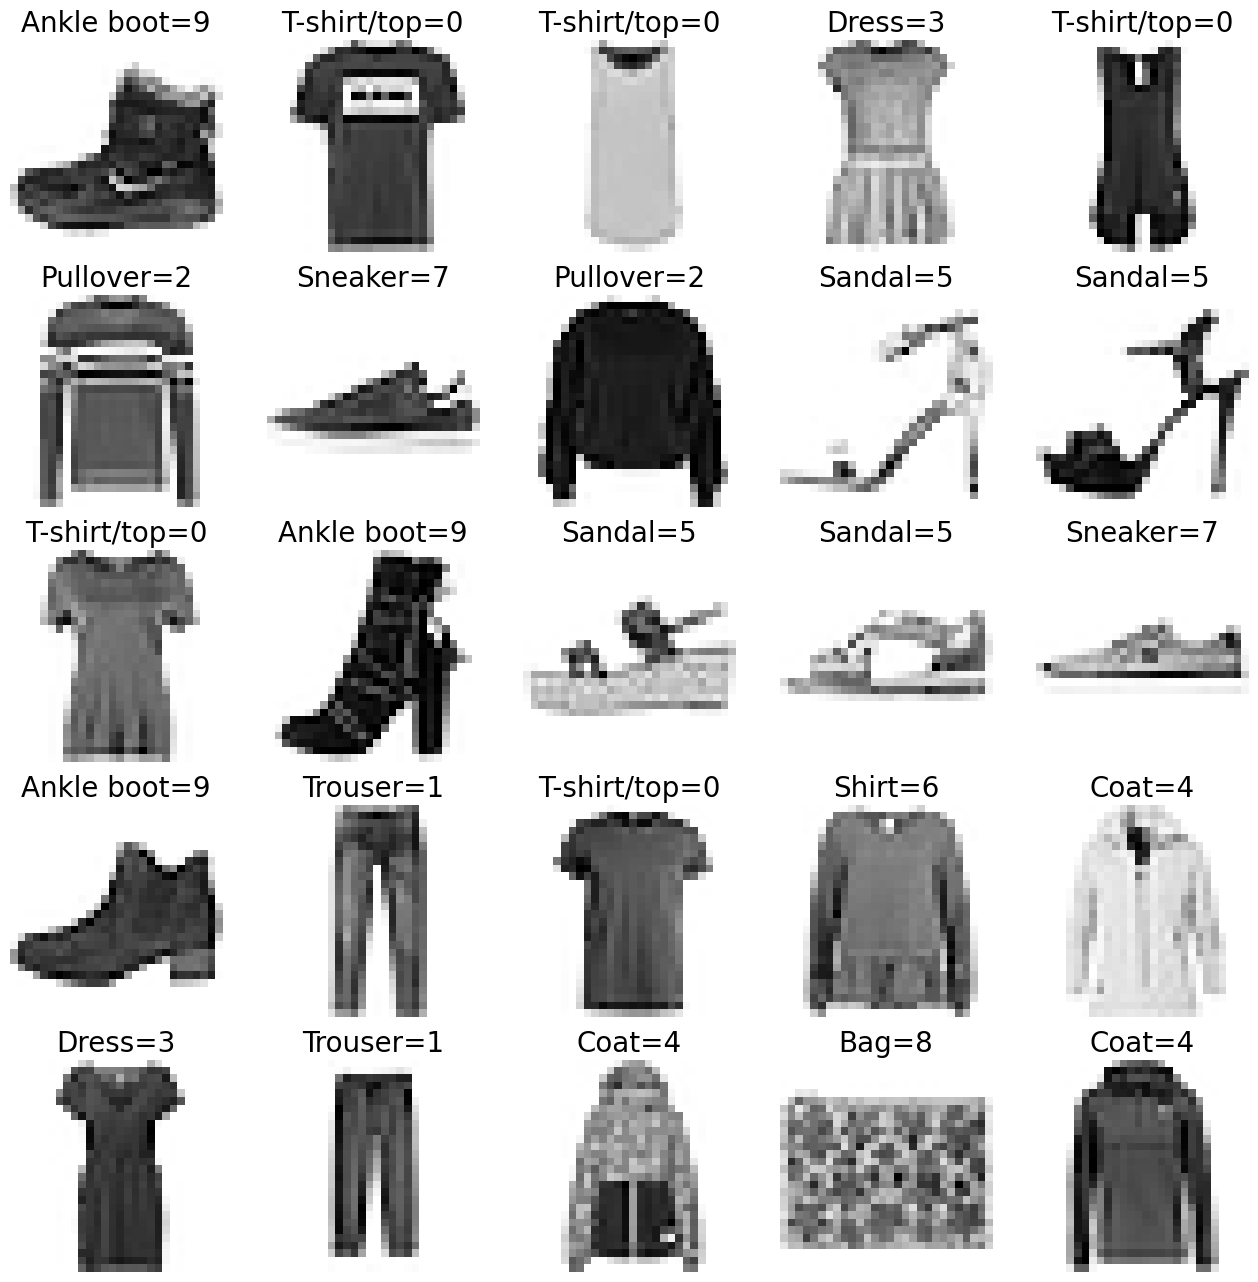

In [ ]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)

#Feature scalling

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#Build neural network

In [ ]:
model = tk.models.Sequential([
    tk.layers.Flatten(input_shape =[28,28]),#now data is converted into single row
    tk.layers.Dense(units = 32,activation='relu'),
    tk.layers.Dense(units = 10,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5520 - accuracy: 0.8120
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4221 - accuracy: 0.8526
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3894 - accuracy: 0.8632
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3647 - accuracy: 0.8700
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3479 - accuracy: 0.8760
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8795
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3221 - accuracy: 0.8837
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3153 - accuracy: 0.8869
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3045 - accuracy: 0.8890
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.299

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3758 - accuracy: 0.8653


[0.3758009374141693, 0.8652999997138977]

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
      dtype=float32)

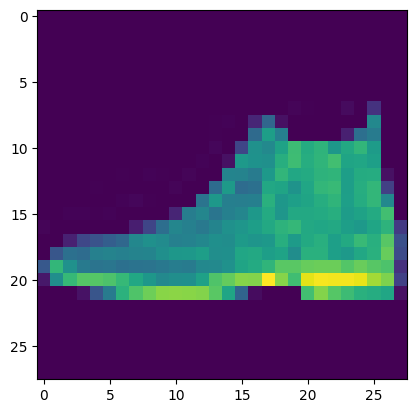

In [ ]:
plt.imshow(x_test[0])

In [ ]:
np.argmax(y_pred[0].round(2))

9

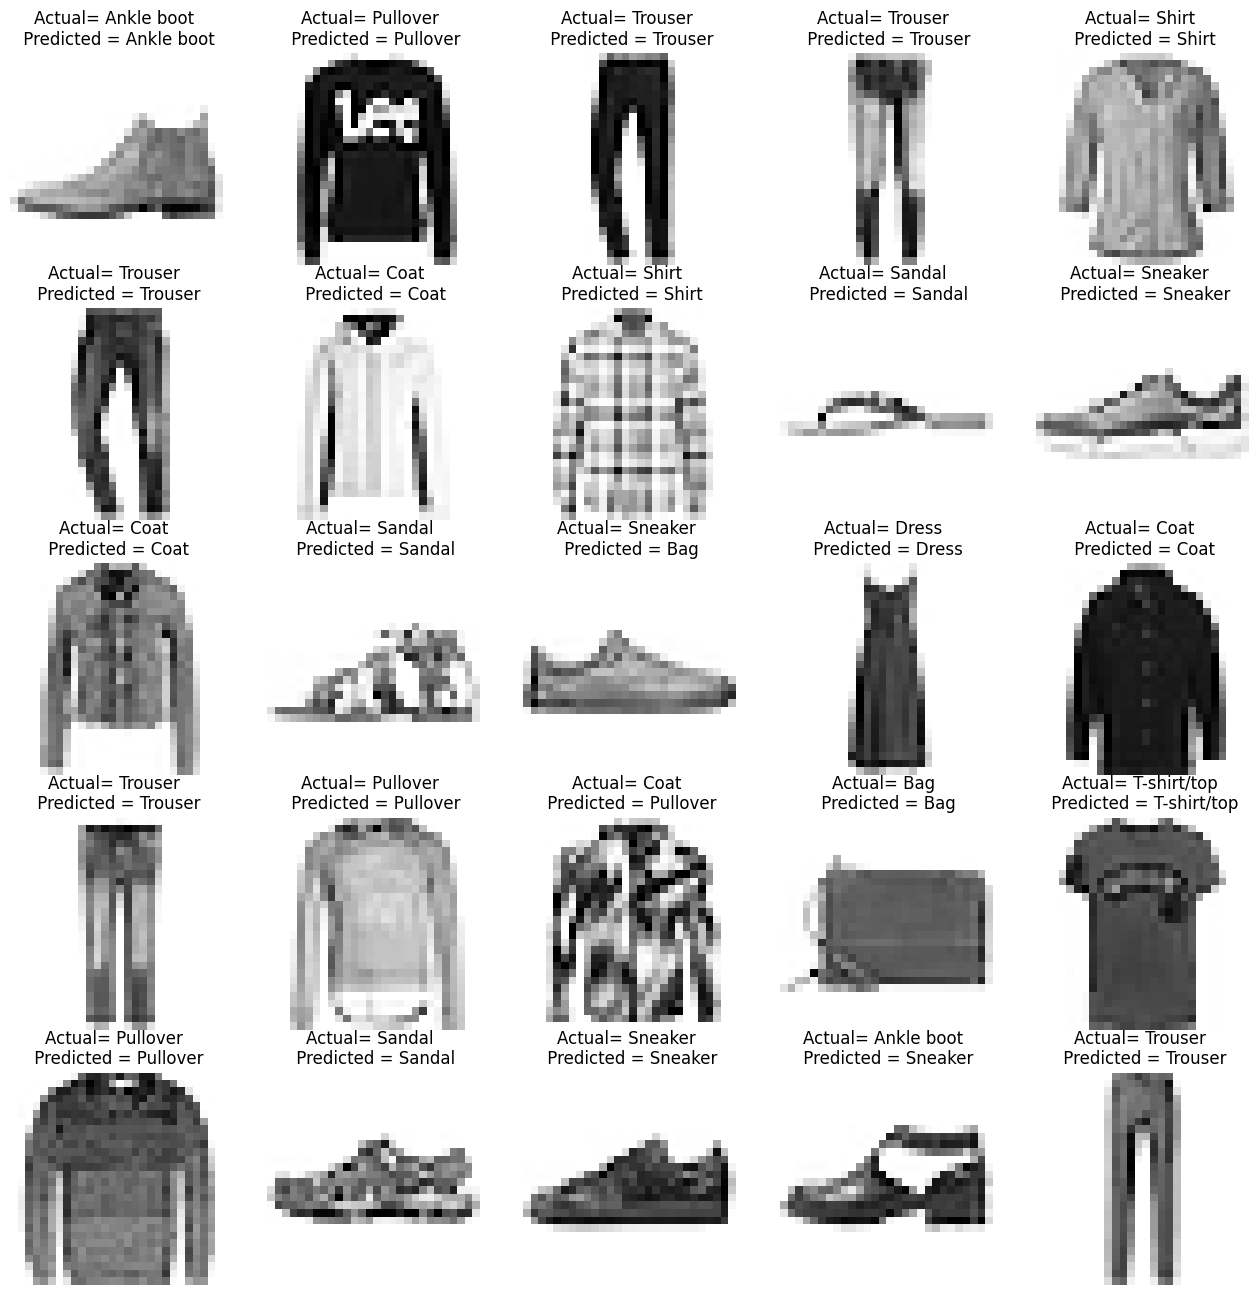

In [ ]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))